# Chande Momentum Oscillator (CMO)

https://www.investopedia.com/terms/c/chandemomentumoscillator.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2022-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.500774,271742800
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.918484,249616000
2018-08-03,51.757500,52.185001,51.369999,51.997501,50.062897,133789600
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.322857,101701600
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.851082,102349600


In [3]:
close = np.array(df['Adj Close'])

In [4]:
len(close)

862

In [5]:
n = 20
moving_period_diffs = [[(close[idx+1-n:idx+1][i] - close[idx+1-n:idx+1][i-1]) for i in range(1, len(close[idx+1-n:idx+1]))] for idx in range(0, len(close))]

In [6]:
sum_up = []
sum_down = []
for period_diffs in moving_period_diffs:
  ups = [val if val > 0 else 0 for val in period_diffs]
  sum_up = np.append(sum_up, sum(ups))
  downs = [abs(val) if val < 0 else 0 for val in period_diffs]
  sum_down = np.append(sum_down, sum(downs))

In [7]:
sum_up = np.array(sum_up)
sum_down = np.array(sum_down)


In [8]:
cmo = 100 * ((sum_up - sum_down) / (sum_up + sum_down))

In [9]:
cmo


array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,  6.48947798e+01,
        6.14698486e+01,  6.34686297e+01,  6.53544756e+01,  7.76630904e+01,
        6.86279733e+01,  4.70273648e+01,  4.17650637e+01,  2.73410530e+01,
        3.59327678e+01,  2.60774545e+01,  2.98925578e+01,  1.48692559e+01,
        5.26768486e+00,  6.97466924e+00,  7.21736626e+00,  9.61453304e+00,
        3.06626859e+00,  5.66930554e+00,  4.98901673e+00, -5.28915211e+00,
       -1.57247248e-01, -3.85170075e+00, -2.20620748e+00,  4.78263500e+00,
        1.81541497e+01,  1.29425273e+01,  1.13696551e+01, -1.68787613e-01,
        1.21491679e+01, -1.89945576e+01, -1.79712696e+01,  7.84061629e+00,
       -1.50832560e+00,  

In [10]:
df['CMO'] = cmo

In [11]:
df = df.fillna(0)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,CMO
Date,,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.500774,271742800,0.000000
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.918484,249616000,0.000000
2018-08-03,51.757500,52.185001,51.369999,51.997501,50.062897,133789600,0.000000
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.322857,101701600,0.000000
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.851082,102349600,0.000000
...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600,35.006066
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300,26.213175
2021-12-29,179.330002,180.630005,178.139999,179.380005,179.151749,62348900,27.602449


In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,CMO
Date,,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.500774,271742800,0.0
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.918484,249616000,0.0
2018-08-03,51.757500,52.185001,51.369999,51.997501,50.062897,133789600,0.0
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.322857,101701600,0.0
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.851082,102349600,0.0


In [14]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,CMO
Date,,,,,,,
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600,35.006066
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300,26.213175
2021-12-29,179.330002,180.630005,178.139999,179.380005,179.151749,62348900,27.602449
2021-12-30,179.470001,180.570007,178.089996,178.199997,177.973251,59773000,27.193964
2021-12-31,178.089996,179.229996,177.259995,177.570007,177.344055,64062300,30.360927


Text(0.5, 0, 'Date')

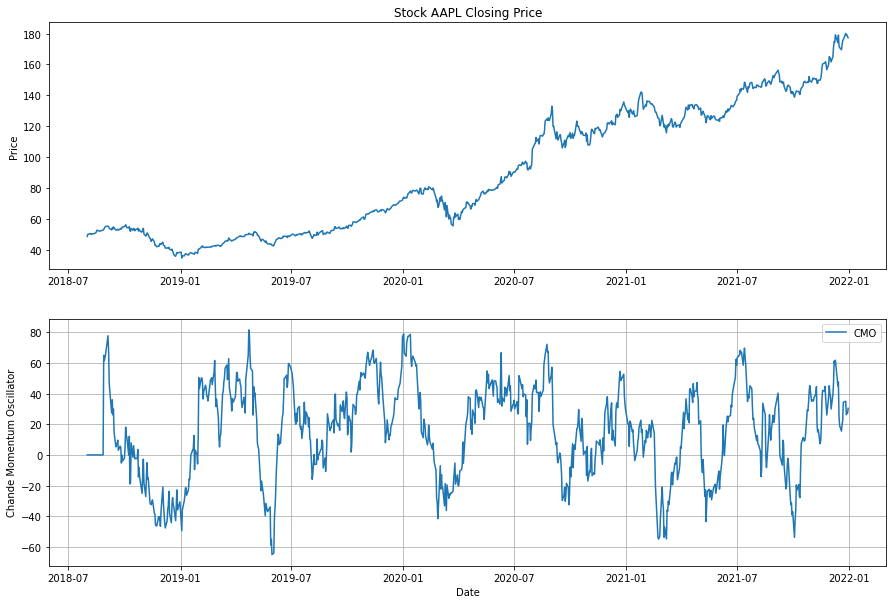

In [15]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['CMO'], label='CMO')
ax2.grid()
ax2.set_ylabel('Chande Momentum Oscillator')
ax2.legend(loc='best')
ax2.set_xlabel('Date')

# Candlestick with Chande Momentum Oscillator

In [16]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,CMO,VolumePositive
0,17744.0,49.782501,50.439999,49.327499,50.375000,48.500774,271742800,0.0,False
1,17745.0,50.145000,52.095001,50.087502,51.847500,49.918484,249616000,0.0,False
2,17746.0,51.757500,52.185001,51.369999,51.997501,50.062897,133789600,0.0,False
3,17749.0,52.000000,52.312500,51.767502,52.267502,50.322857,101701600,0.0,False
4,17750.0,52.330002,52.375000,51.689999,51.777500,49.851082,102349600,0.0,False


Text(0.5, 0, 'Date')

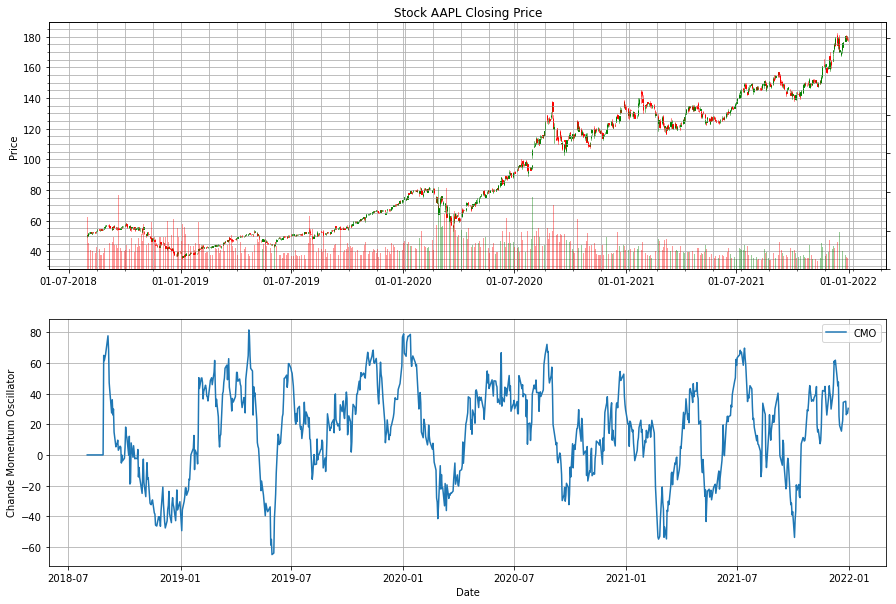

In [17]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['CMO'], label='CMO')
ax2.grid()
ax2.set_ylabel('Chande Momentum Oscillator')
ax2.legend(loc='best')
ax2.set_xlabel('Date')